Multiple Linear Regression - VISHWANTH P 21MIS1117

DATASET LINK : https://drive.google.com/file/d/1yuAcWtnzZ2BMnyq7mpfYS8tYOpn442pC/view?usp=drive_link

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [14]:
df=pd.read_csv(r'C:\Users\Vishwanth Prakash\Desktop\21MIS1117\Advertising.csv')

In [16]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


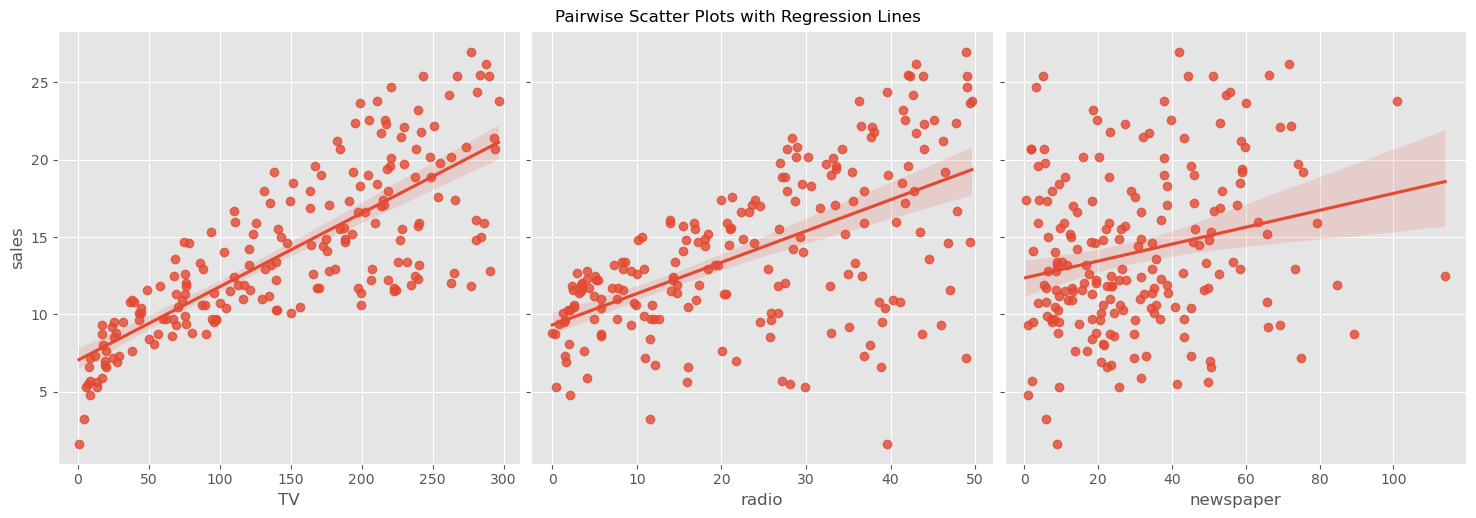

In [20]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=1, kind='reg')
plt.suptitle('Pairwise Scatter Plots with Regression Lines', y=1.02)
plt.show()

In [21]:
x = df.drop('sales', axis=1)
y = df['sales']

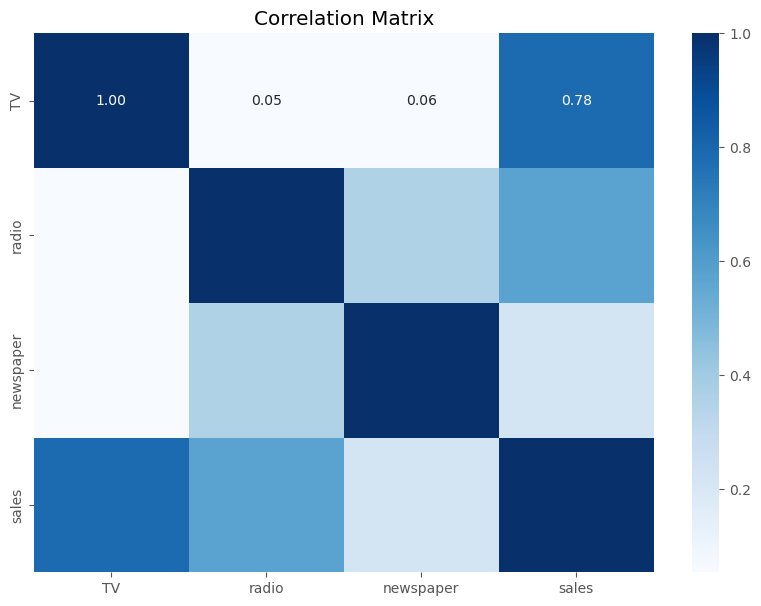

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [26]:
x_with_const = sm.add_constant(x)

In [28]:
vif = pd.DataFrame()
vif['Feature'] = x_with_const.columns
vif['VIF'] = [variance_inflation_factor(x_with_const.values, i) for i in range(x_with_const.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif)

Variance Inflation Factor (VIF):
     Feature       VIF
0      const  6.848900
1         TV  1.004611
2      radio  1.144952
3  newspaper  1.145187


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [34]:
intercept = lm.intercept_
coefficients = lm.coef_
features = x.columns

In [36]:
feature_names = ['x1', 'x2', 'x3'] # x1 - TV, x2 - radio, x3 - Newspaper

In [38]:
equation = f"Sales = {intercept:.2f}"
for feature, coef in zip(feature_names, coefficients):
    equation += f" + ({coef:.2f} * {feature})"
print("\nFinal Regression Equation:")
print(equation)


Final Regression Equation:
Sales = 2.98 + (0.04 * x1) + (0.19 * x2) + (0.00 * x3)


In [40]:
y_pred = lm.predict(x_test)

In [42]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print("\nModel Performance Metrics:")
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Model Performance Metrics:
R-squared: 0.899438024100912
Mean Squared Error: 3.1740973539761046
Root Mean Squared Error: 1.7815996615334502


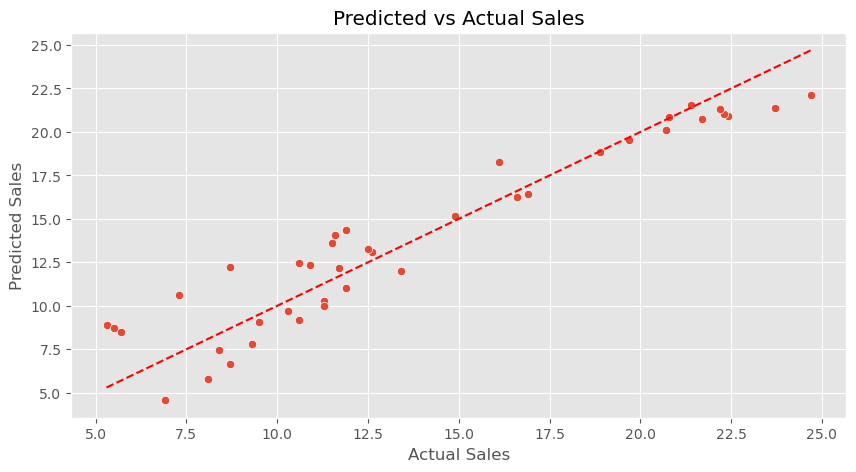

In [44]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.show()

Inference:

The high R-squared value and relatively low MSE and RMSE indicate that the model performs well in predicting sales based on TV and radio advertising expenditures. However, the minimal impact of newspaper advertising suggests it might not be as influential in the current model.